In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy as sp
from scipy.stats import norm
from scipy.stats import gaussian_kde
from IPython import display

# Non-parametric Density Estimation
In this notebook present nonparametric density estimation in order to approximate a GMM with 2 components. The true PDF, which we sample from is defined by

$p(x) = 0.85 \cdot \mathcal{N}(\mu= 3,\sigma^2=1)+ 0.15 \cdot \mathcal{N}(\mu=8, \sigma^2=0.04)$,

where $\mathcal{N}$ is the Gaussian distribution. 

## Sampling
First we sample NrPoints from the specified distribution $p(x)$
## Distribution Fitting
Then we estimate $\hat{p(x)} \approx p(x)$ by applying a non-parametric estimator and smoothing (i.e., convolving) it with Gauss-kernels, i.e.,

$p_{emp}(x) = \frac{1}{N}\sum_{n=1}^N \delta(x-x_n)$,

$h(x) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp (-\frac{x^2}{2\sigma^2})$

$\hat{p(x)} = p_{emp} * h(x) = \frac{1}{N} \sum_{n=1}^{N} h(x-x_n)$

In [ ]:
# Generate True PDF and plot it
xmin = -3
xmax = 10
NrPoints = 1000;

delta = (xmax-xmin)/NrPoints
x = np.arange(xmin, xmax, delta) # import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy as sp
from scipy.stats import norm
from scipy.stats import gaussian_kde
from IPython import display

PDF_true = 0.85*norm.pdf(x,3,1)+0.15*norm.pdf(x,8,0.2) # Attention: norm.pdf requires the std instead of the var! 

plt.plot(x,PDF_true)
plt.show()

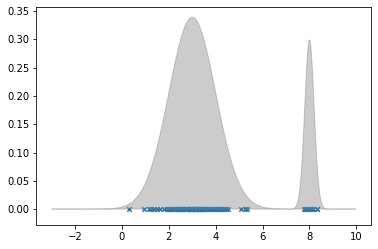

In [19]:
# Sample from GMM and plot kernel density estimation
N = 100
sample = np.zeros((N,1),)

for i in list(range(N)):
    draw = np.random.rand(1)
    if draw <= 0.85:
        sample[i]=np.random.randn(1)*1+3  # To sample from a N(mu,sigma^2) distribution, first sample from N(0,1)
    else:                                 # and then scale the sample by the std sigma and shift it by the mean mu.
        sample[i]=np.random.randn(1)*0.2+8
        
plt.scatter(sample,np.zeros((N,1)),s=20,marker='x')
plt.fill(x,PDF_true,ec='gray',fc='gray', alpha=0.4)
plt.show()

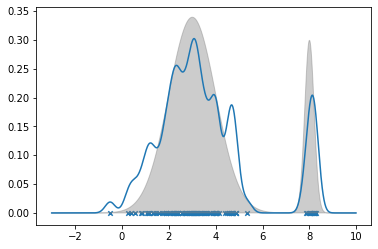

In [16]:
# Estimate the PDF with (Gaussian) kernel density estimation

sample = np.array(sample)    # Need to convert the list to an array first.
t=gaussian_kde(sample.T,0.1) # Produces a Gaussian kernel estimator (a smooth fct.) based on all data samples.
tt = t.evaluate(x)           # Evaluates that function on our domain.

plt.plot(x,tt)
plt.scatter(sample,np.zeros((N,1)),s=20,marker='x')
plt.fill(x,PDF_true,ec='gray',fc='gray', alpha=0.4)
plt.show()

In [ ]:
# Now do it step by step
# Fix the size of the plot beforehand!
N = 100
sample = []
for i in list(range(1,N)):
    draw = np.random.rand(1)
    if draw <= 0.85:
        sample.extend([np.random.randn(1)[0]*1+3])
    else:
        sample.extend([np.random.randn(1)[0]*0.2+8])
    if i > 1: # otherwise kde crashes
        t=gaussian_kde(np.asarray(sample),0.1)
        tt = t.evaluate(x)
        plt.scatter(np.asarray(sample),np.zeros((i,1)),s=30,marker='x')
        plt.fill(x,PDF_true,ec='gray',fc='gray', alpha=0.4)
        plt.plot(x,tt)
        plt.ylim((-0.05,0.5))
        plt.show()
        input("Press Enter")

        display.clear_output(wait=True)
    